<a href="https://colab.research.google.com/github/VitorPBortoluzzi/Mirkos/blob/main/Simplex26_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Solução ótima encontrada:
Quantidade de biscoitos de chocolate: 3.60
Quantidade de biscoitos de baunilha: 2.80
Valor ótimo: 6.40


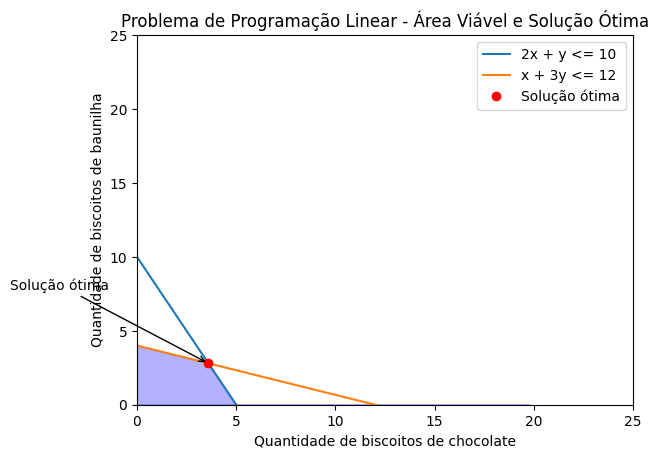

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# # Coeficientes das restrições
# # Lado Esquerdo
# numRestricoes = int(input("Digite o nume de restrições: "))
# for i in numRestricoes:
#   E_input = input("Digite o valor dos Coeficientes das restrições: ")
  
A = [[2, 1], [1, 3]]

# Lado Direito
b = [10, 12]

# Limites das variáveis
x_bounds = (0, None)
y_bounds = (0, None)

# Resolver o problema utilizando o Simplex
c = [-1, -1]  # Coeficientes da função objetivo (-1 para maximizar)
res = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds])

# Verificar se a solução é ótima
if res.success:
    # Extrair as variáveis de decisão otimizadas
    x_opt = res.x[0]
    y_opt = res.x[1]
    opt_value = -res.fun  # O valor ótimo é negativo, multiplicamos por -1 para obter o valor correto

    print("Solução ótima encontrada:")
    print("Quantidade de biscoitos de chocolate: {:.2f}".format(x_opt))
    print("Quantidade de biscoitos de baunilha: {:.2f}".format(y_opt))
    print("Valor ótimo: {:.2f}".format(opt_value))

    # Plotar as restrições e a solução ótima
    x = np.linspace(0, 35, 70)
    y1 = 10 - 2 * x
    y2 = (12 - x)/3
    feasible_x = np.minimum(x, 5)
    feasible_y = np.minimum(y1, y2)

    plt.plot(x, y1, label='2x + y <= 10')
    plt.plot(x, y2, label='x + 3y <= 12')
    plt.fill_between(feasible_x, 0, feasible_y, where=(feasible_x <= 20), color='blue', alpha=0.3)

    plt.plot(x_opt, y_opt, 'ro', label='Solução ótima')
    plt.annotate('Solução ótima', (x_opt, y_opt), xytext=(x_opt - 10, y_opt + 5),
                 arrowprops=dict(facecolor='black', arrowstyle='->'))

    plt.xlim((0, 25))
    plt.ylim((0, 25))
    plt.xlabel('Quantidade de biscoitos de chocolate')
    plt.ylabel('Quantidade de biscoitos de baunilha')
    plt.title('Problema de Programação Linear - Área Viável e Solução Ótima')
    plt.legend(loc='upper right')

    plt.show()
else:
    print("O problema de programação linear não possui solução ótima.")